In [40]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
import pickle

In [41]:
# reading csv and convering to dataframe
df = pd.read_csv('..\data\possom_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           101 non-null    int64  
 1   population     101 non-null    object 
 2   sex            101 non-null    object 
 3   age            101 non-null    float64
 4   head_len       101 non-null    float64
 5   skull_width    101 non-null    float64
 6   total_len      101 non-null    float64
 7   tail_len       101 non-null    float64
 8   foot_len       101 non-null    float64
 9   ear_conch_len  101 non-null    float64
 10  eye            101 non-null    float64
 11  chest_girth    101 non-null    float64
 12  belly_girth    101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.4+ KB


In [42]:
# 'probably' independent variables
independents = ['site', 'age']

# 'probably' dependend variables
dependents = ['head_len', 'skull_width', 'total_len', 'tail_len', 'foot_len', 'ear_conch_len', 'eye', 'chest_girth', 'belly_girth']

In [43]:
independents_values = []
dependents_values = []

for var in independents:
    independents_values.append(np.array(df[var]).reshape(-1, 1))

for var in dependents:
    dependents_values.append(np.array(df[var]).reshape(-1, 1))

## Linear Regression

In [44]:
def plot_linear_regression(x, y, prediction, i_name, d_name)->None:
    plt.scatter(x, y, color = 'green')
    plt.plot(x, prediction, color = 'red')
    plt.title(i_name + ' vs ' + d_name)
    plt.xlabel(i_name)
    plt.ylabel(d_name)
    plt.show()

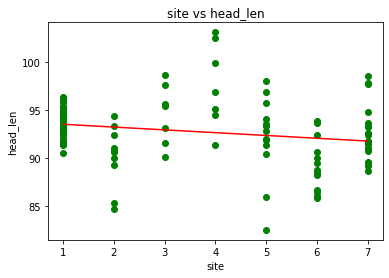

Mean square error:  11.788692482057927
Root mean square error:  3.4334665401104356
R2 score:  0.03834550876291787


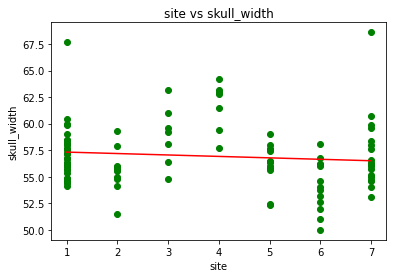

Mean square error:  9.429470744465842
Root mean square error:  3.0707443306901734
R2 score:  0.010683961151682686


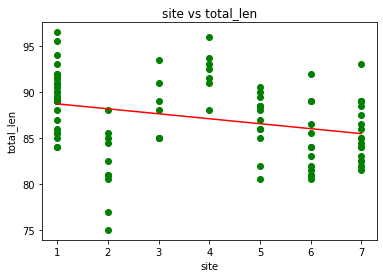

Mean square error:  15.820321298345227
Root mean square error:  3.9774767501954336
R2 score:  0.092807030051696


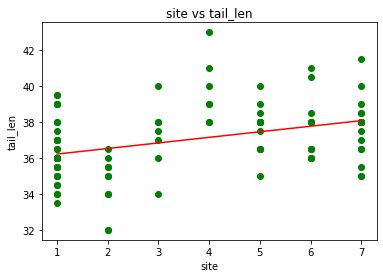

Mean square error:  3.316203312742289
Root mean square error:  1.8210445663800459
R2 score:  0.13843240644651333


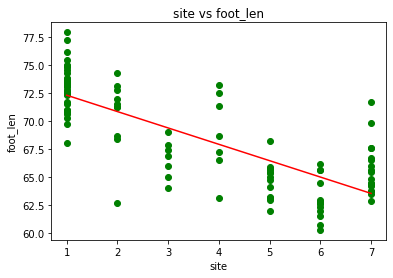

Mean square error:  7.507611858160118
Root mean square error:  2.7400021638969774
R2 score:  0.6107249079303223


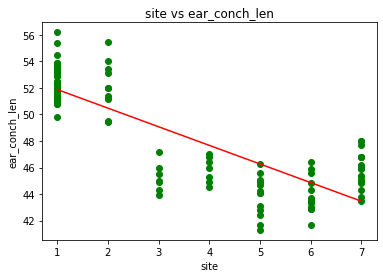

Mean square error:  5.385473503626207
Root mean square error:  2.32066229848856
R2 score:  0.6700729118743083


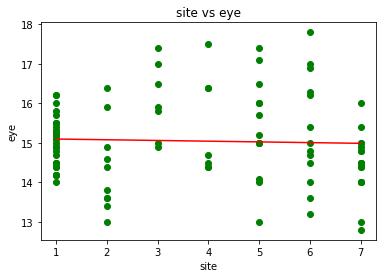

Mean square error:  1.1078135596423446
Root mean square error:  1.0525272251311815
R2 score:  0.0016355998494997914


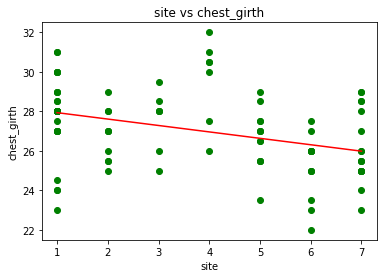

Mean square error:  3.458268005673707
Root mean square error:  1.8596419025376114
R2 score:  0.14460453848968902


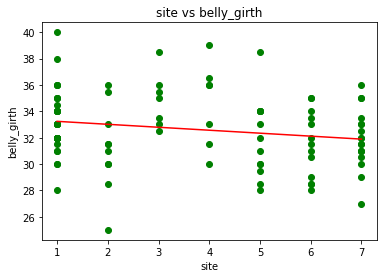

Mean square error:  7.086671503829894
Root mean square error:  2.6620802962776864
R2 score:  0.03804210232110761


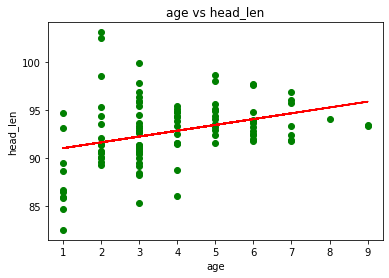

Mean square error:  10.927785854140124
Root mean square error:  3.3057201717840736
R2 score:  0.10857337555416391


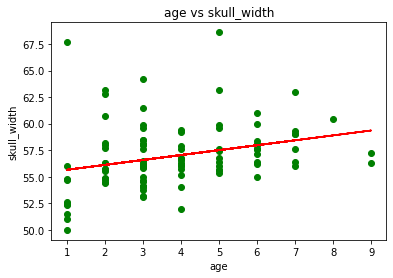

Mean square error:  8.754060421536405
Root mean square error:  2.958726148452473
R2 score:  0.0815462909033261


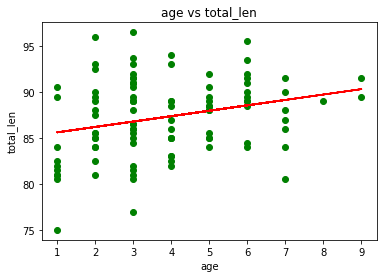

Mean square error:  16.18346060530579
Root mean square error:  4.0228672119901985
R2 score:  0.07198334258202499


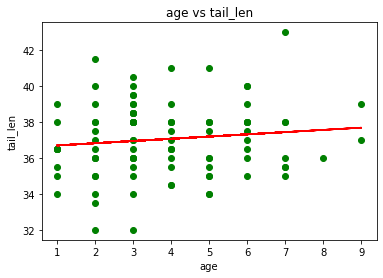

Mean square error:  3.793418391264165
Root mean square error:  1.9476699903382413
R2 score:  0.0144493426730401


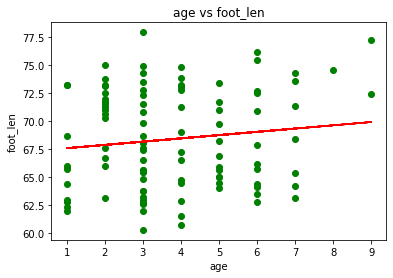

Mean square error:  18.979022320657812
Root mean square error:  4.356491974129852
R2 score:  0.015923998090503044


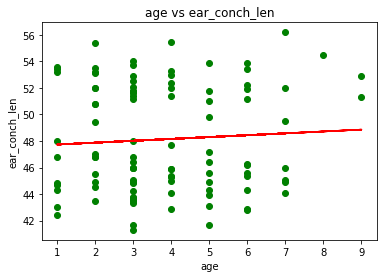

Mean square error:  16.251613271271527
Root mean square error:  4.0313289708570705
R2 score:  0.00438699766600581


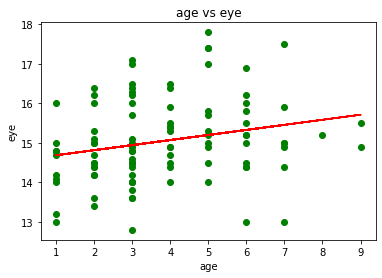

Mean square error:  1.0499772853979235
Root mean square error:  1.0246839929451048
R2 score:  0.053757797434455634


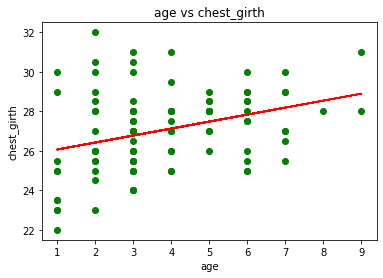

Mean square error:  3.5890925410902046
Root mean square error:  1.8944900477675264
R2 score:  0.11224535936711377


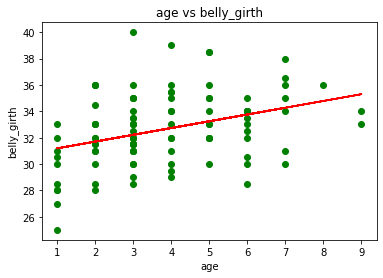

Mean square error:  6.407836551079389
Root mean square error:  2.5313704887035775
R2 score:  0.13018841440371443


In [45]:
predict = []
model = [LinearRegression() for _ in range (0, 18)]
k = 0
for i, ivar in enumerate(independents_values):
    for d, dvar in enumerate(dependents_values):
        # fitting
        model[k].fit(ivar, dvar)
        # predicition
        predict.append(model[k].predict(ivar))
        plot_linear_regression(ivar, dvar, predict[k], independents[i], dependents[d])
        # errors
        err = mean_squared_error(dvar, predict[k])
        print('Mean square error: ', err)
        print('Root mean square error: ', math.sqrt(err))
        print("R2 score: ", r2_score(dvar, predict[k]))
        k+=1


## Support Vector Regression

In [46]:
# scaling and transforming
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(independents_values[1])
Y = sc_y.fit_transform(dependents_values[2])

In [47]:
# plotting function
def plot_SVR(x, y, i_name, d_name, regressor)->None:
    X_grid = np.arange(min(x), max(x), 0.01) # data is feature scaled.
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(x, y, color = 'red')
    plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
    plt.title(i_name + ' vs ' + d_name)
    plt.xlabel(i_name)
    plt.ylabel(d_name)
    plt.show()

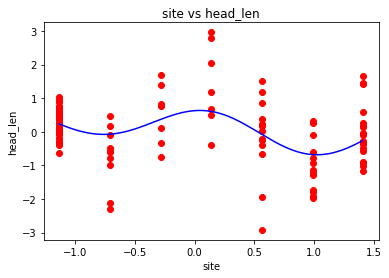

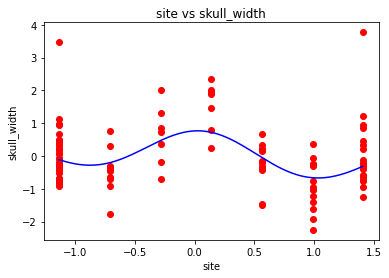

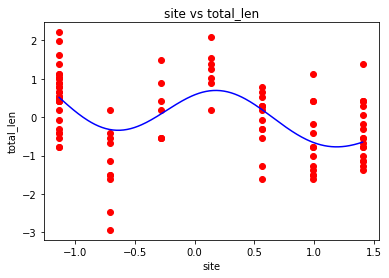

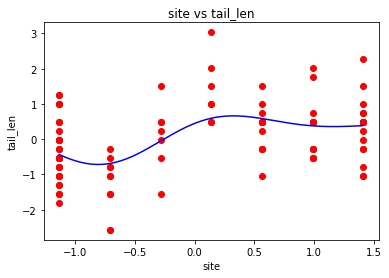

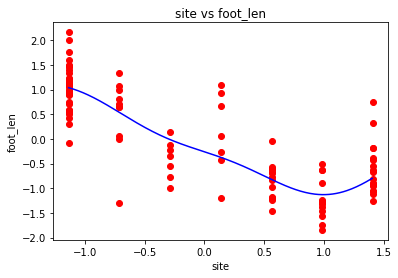

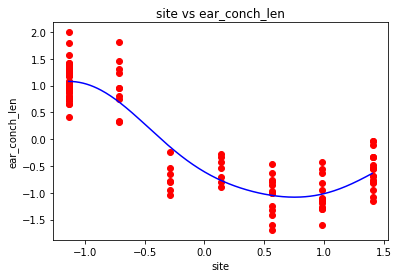

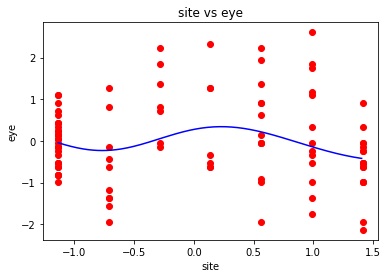

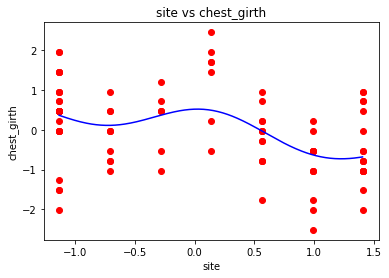

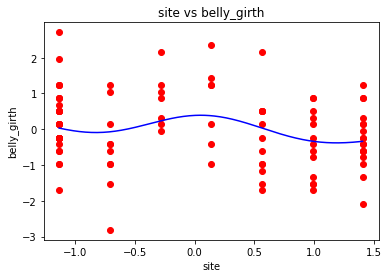

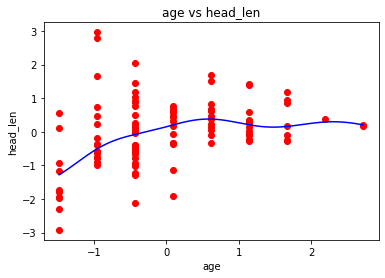

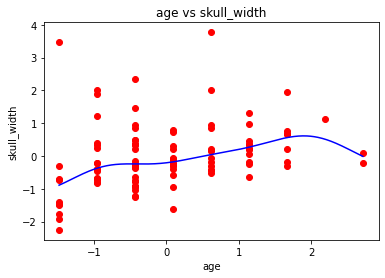

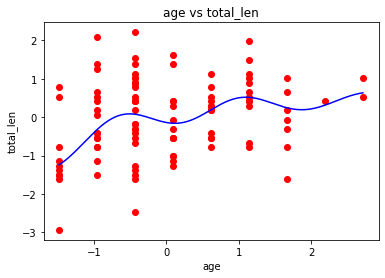

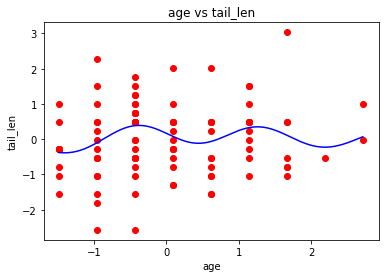

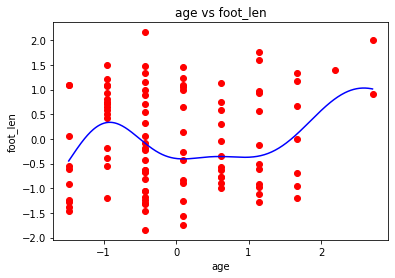

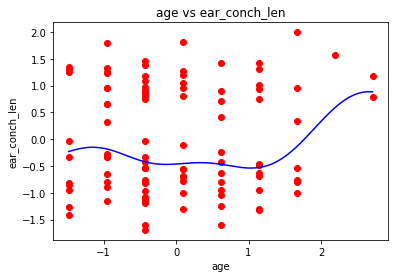

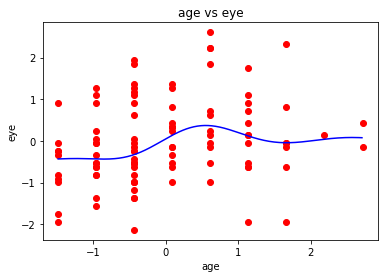

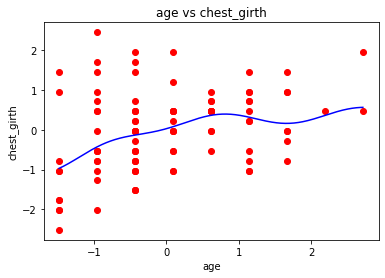

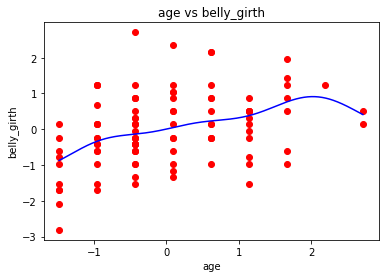

In [48]:
# scaling
predict = []
sc_x = [StandardScaler() for _ in range (0, 18)]
sc_y = [StandardScaler() for _ in range (0, 18)]
regressors = [SVR(kernel = 'rbf') for _ in range(0, 18)]

k = 0
for i, ivar in enumerate(independents_values):
    for d, dvar in enumerate(dependents_values):
        #transformation
        X = sc_x[k].fit_transform(ivar)
        Y = sc_y[k].fit_transform(dvar)
        #regression
        regressors[k].fit(X, Y.ravel())
        plot_SVR(X, Y, independents[i], dependents[d], regressors[k])
        k+=1

Therefore we can see that SVR is slightly better than linear regression

## Pickling


In [49]:
with open('..\models\model.pkl', 'wb') as final_model:
    pickle.dump(regressors[i], final_model)